# About the Project

The purpose of the project is to make a system which tells whether the person will be save from sinking.

# Project Flow

* Ask the question
* Get Data
* Investigate Data
* Prepare Data
* Feature Engineering
* Analyze Data
* Data Preprocessing
* Model Design
* Model Training
* Model Testing

## Ask Question

* What are features that contributed to the survival of people in Titanic sinking?

## Get Data

* This step involves the process of locating and obtaining data that is relevant to the question, and then determining if there is enough data to complete the analysis. To proceed, acquire train and test titanic data from Kaggle

In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Investigate Data

* Data comes in many forms and from various sources. This step involves determining if the data is complete and contains the relevant information necessary for the analysis.

## Prepare the data

* This step can encompass various tasks aimed at transforming the data into a format suitable for the tools that will be used for analysis and presentation. This process is often referred to as "data cleaning" because it involves rectifying issues such as blank records or obvious errors in the dataset. This phase ensures that the data is prepared and ready for analysis.

#### Shape of data

In [3]:
train_data.shape

(891, 12)

In [4]:
test_data.shape

(418, 11)

#### Data Types

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Checking Colunm Names

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Missing Values

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Handle Missing Values

In [11]:
# Fill missing values for numeric columns with the mean
numeric_columns_train = train_data.select_dtypes(include=['float64','int64']).columns
numeric_columns_test = test_data.select_dtypes(include=['float64','int64']).columns
train_data[numeric_columns_train] = train_data[numeric_columns_train].fillna(train_data[numeric_columns_train].mean())
test_data[numeric_columns_test] = test_data[numeric_columns_test].fillna(test_data[numeric_columns_test].mean())

In [12]:
# fill the NaN values with "Unknow" in Cabin
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

#fill "embarked" with the mode
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)

In [13]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Duplicates

In [15]:
train_data.duplicated().sum()

0

In [16]:
test_data.duplicated().sum()

0

#### Unique Values

In [17]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [18]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Cabin           77
Embarked         3
dtype: int64

#### Information about data

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Statistical Summary

In [21]:
train_data.describe().T

count        mean         std   min       25%         50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.000000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.000000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.000000    3.0   
Age          891.0   29.699118   13.002015  0.42   22.0000   29.699118   35.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.000000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.000000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.454200   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [22]:
test_data.describe().T

count         mean         std     min       25%         50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.50000   
Pclass       418.0     2.265550    0.841838    1.00    1.0000     3.00000   
Age          418.0    30.272590   12.634534    0.17   23.0000    30.27259   
SibSp        418.0     0.447368    0.896760    0.00    0.0000     0.00000   
Parch        418.0     0.392344    0.981429    0.00    0.0000     0.00000   
Fare         418.0    35.627188   55.840500    0.00    7.8958    14.45420   

                 75%        max  
PassengerId  1204.75  1309.0000  
Pclass          3.00     3.0000  
Age            35.75    76.0000  
SibSp           1.00     8.0000  
Parch           0.00     9.0000  
Fare           31.50   512.3292

#### Count values in Survived Column

In [23]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Feature Engineering

#### Create Title Column

In [24]:
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#### Drop Name Column

In [25]:
# Drop the "Name" column
test_data.drop(columns=['Name'], inplace=True)
train_data.drop(columns=['Name'], inplace=True)

#### Drop Cabin Column and Create Deck Column

In [26]:
train_data['Deck'] = train_data['Cabin'].str[0]
test_data['Deck'] = test_data['Cabin'].str[0]

train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

#### Drop Ticket Column

In [27]:
train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

#### Create Family Size Column

In [28]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

## Analyse Data

#### Explorative Data Analysis

In [29]:
from ydata_profiling import ProfileReport

In [30]:
#initialize profile variable to use it to find the analytics about the data
profile_train= ProfileReport(train_data,title="Titanic Training Data Report", explorative=True)

In [31]:
#Output the report about the data
profile_train.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

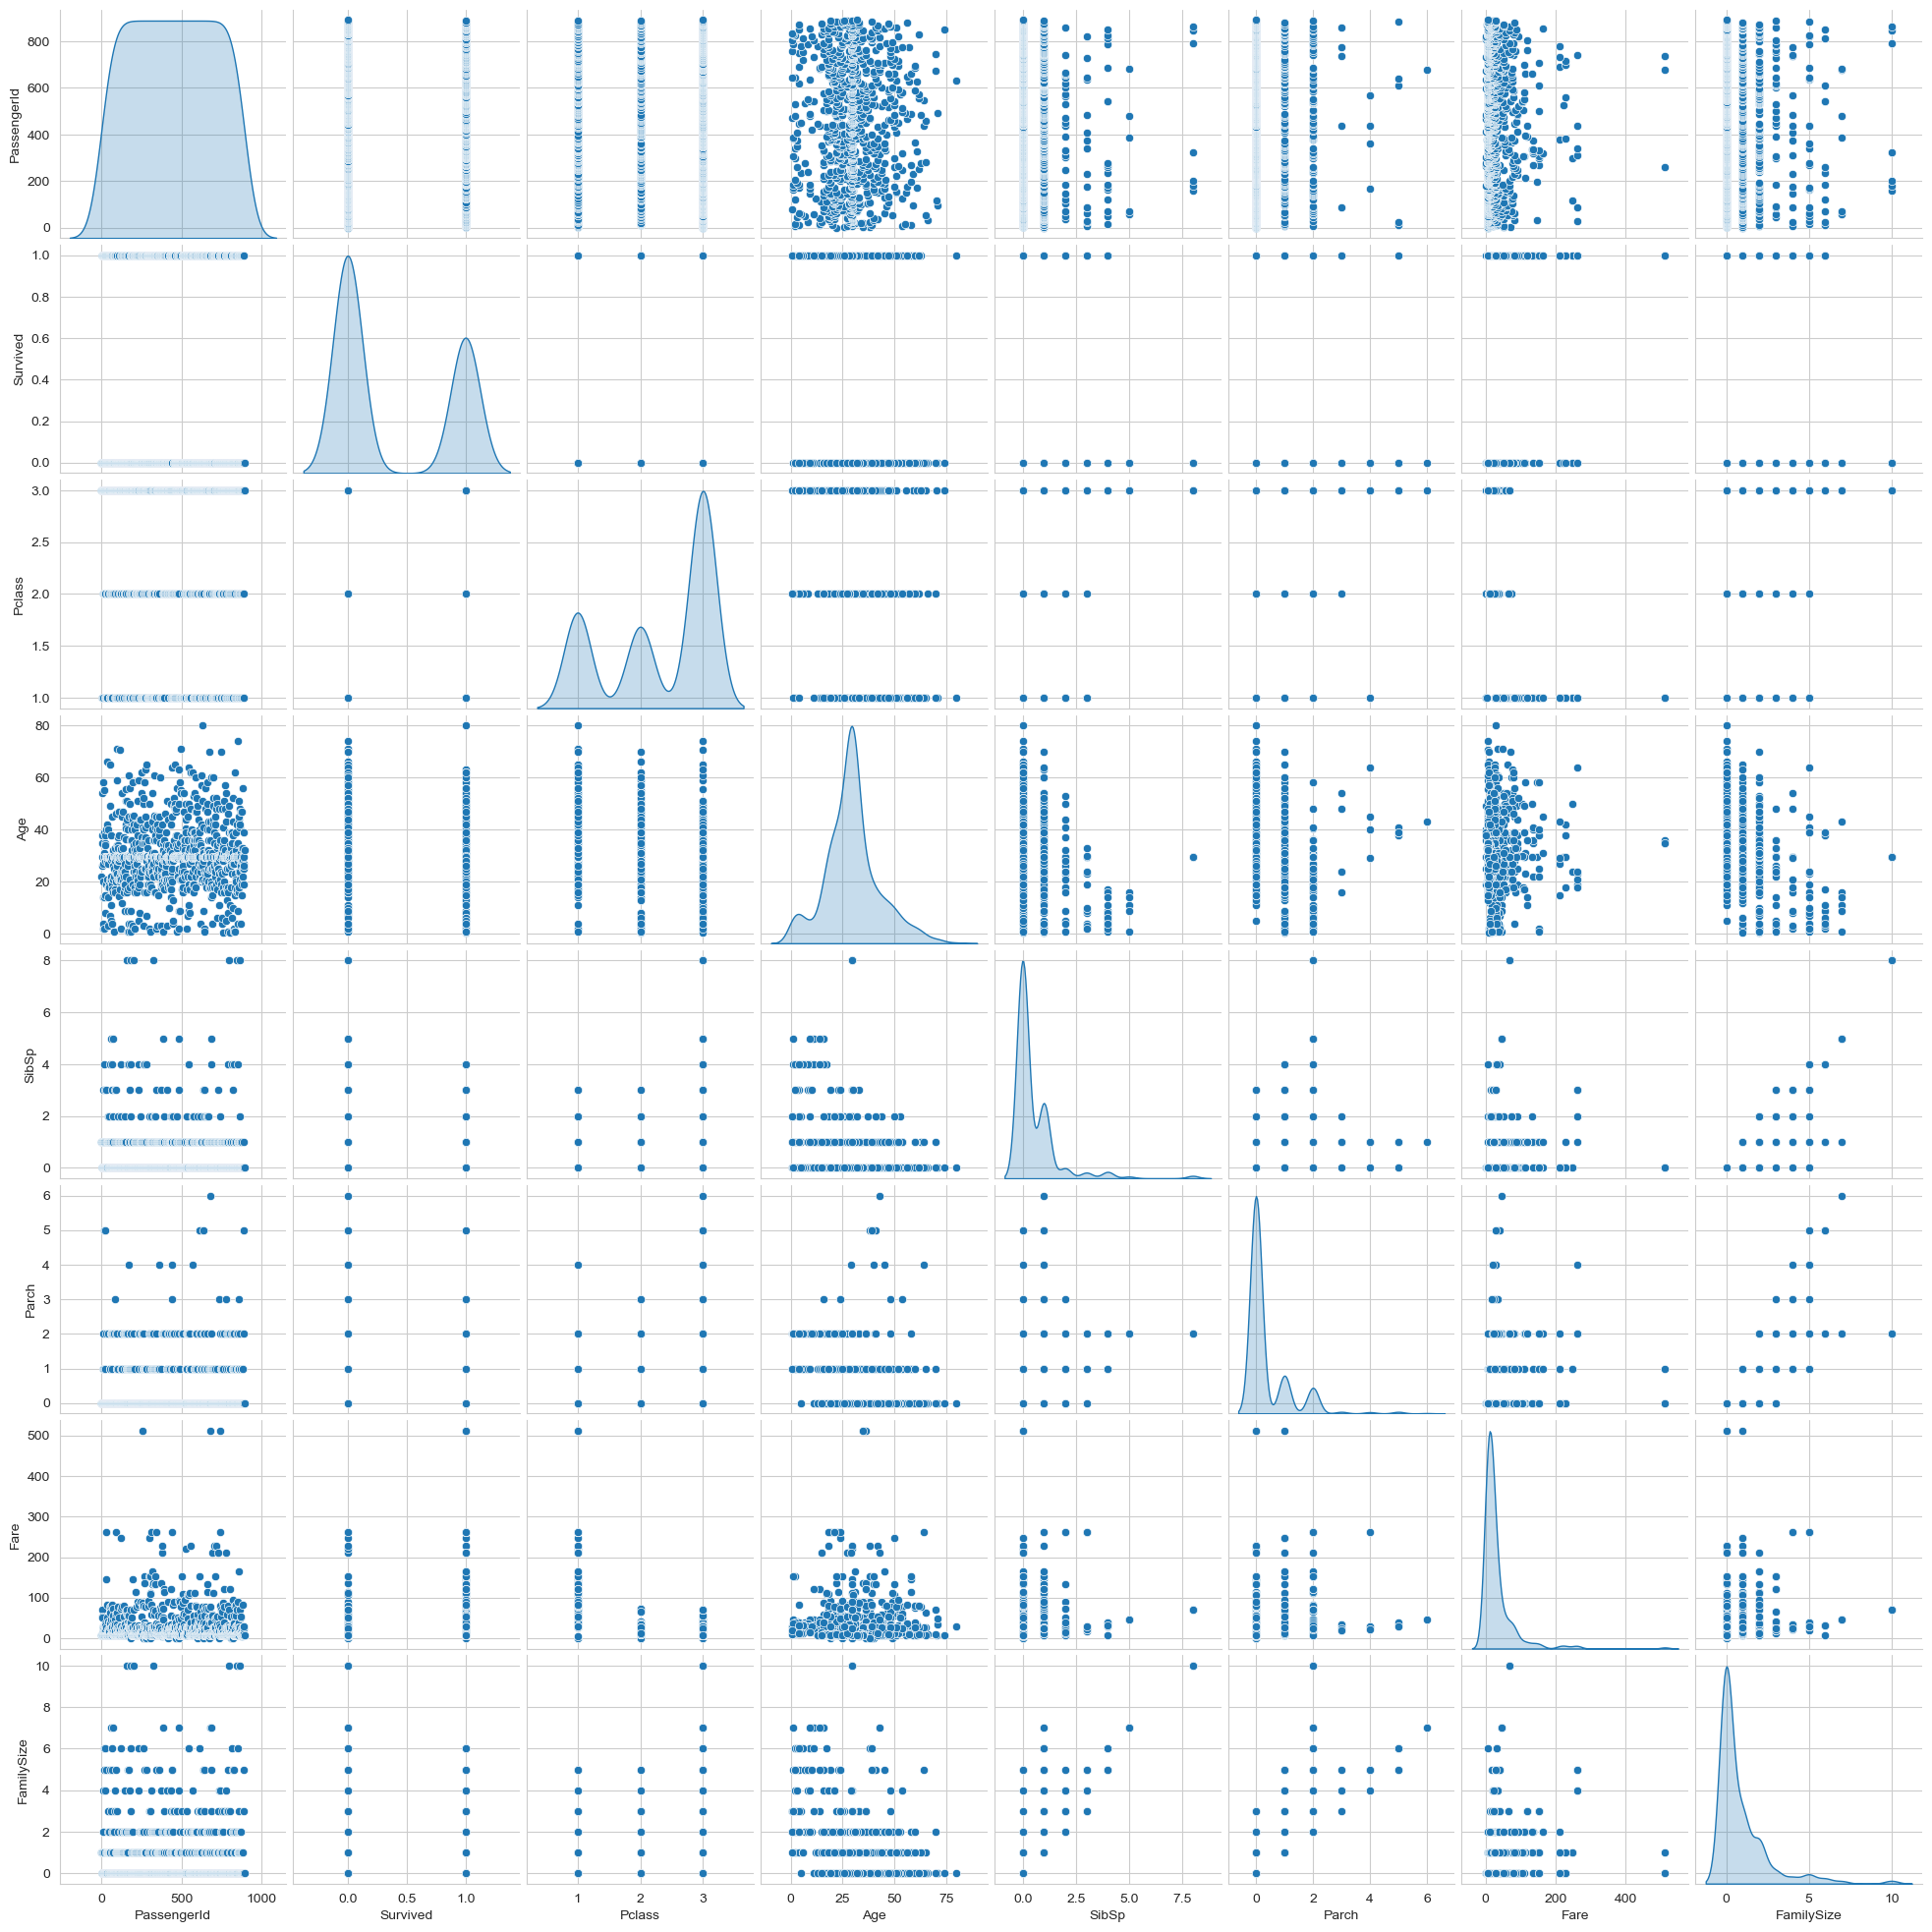

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set up the visualization style
sns.set_style("whitegrid")

# Create a pairplot to visualize relationships between variables
sns.pairplot(train_data, diag_kind='kde')
plt.show()

#### Analysis of Survival Rate

In [33]:
# Analysis of Survival Rate
def survival_rate(group):
    return group['Survived'].mean() * 100

#### Survival by Class

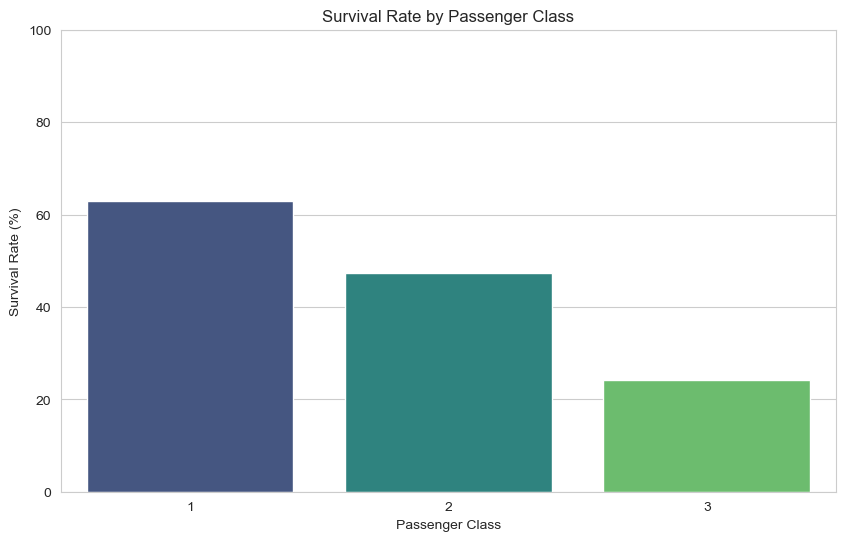

In [34]:
# Survival by Class
class_survival = train_data.groupby('Pclass')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=class_survival.index, y=class_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival by Sex

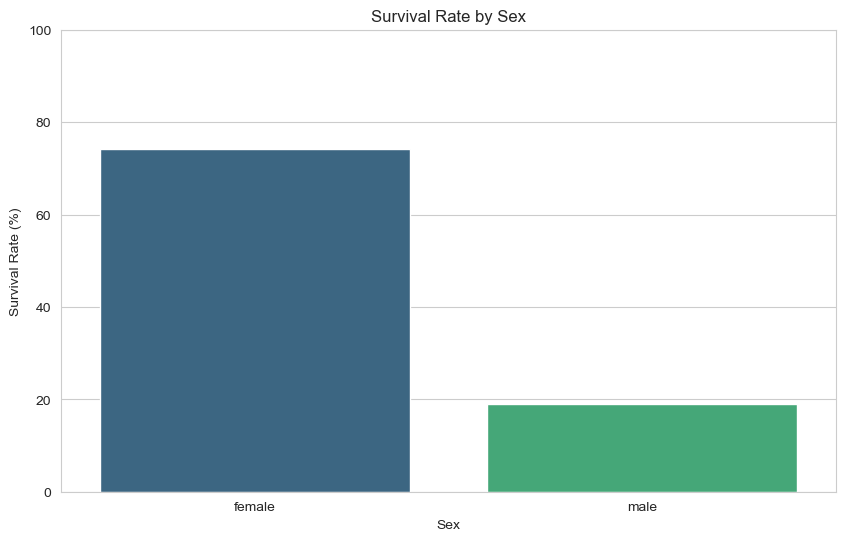

In [35]:
# Survival by Sex
sex_survival = train_data.groupby('Sex')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sex_survival.index, y=sex_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival by Age Group

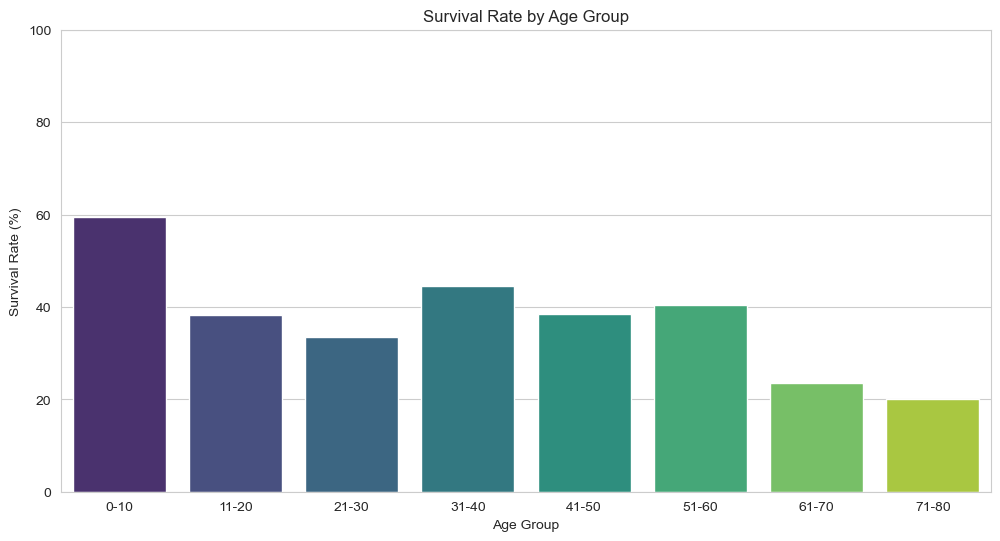

In [36]:
# Survival by Age Group
age_bins = pd.cut(train_data['Age'], bins=[0, 10, 20, 30, 40 , 50, 60, 70, 80 ], labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
age_survival = train_data.groupby(age_bins)['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=age_survival.index, y=age_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival by Embarked

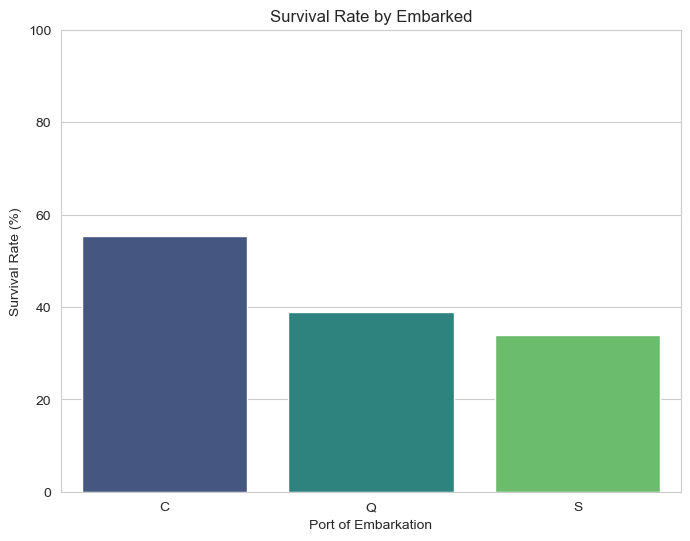

In [37]:
# Survival by Embarked
embarked_survival = train_data.groupby('Embarked')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=embarked_survival.index, y=embarked_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival by Title

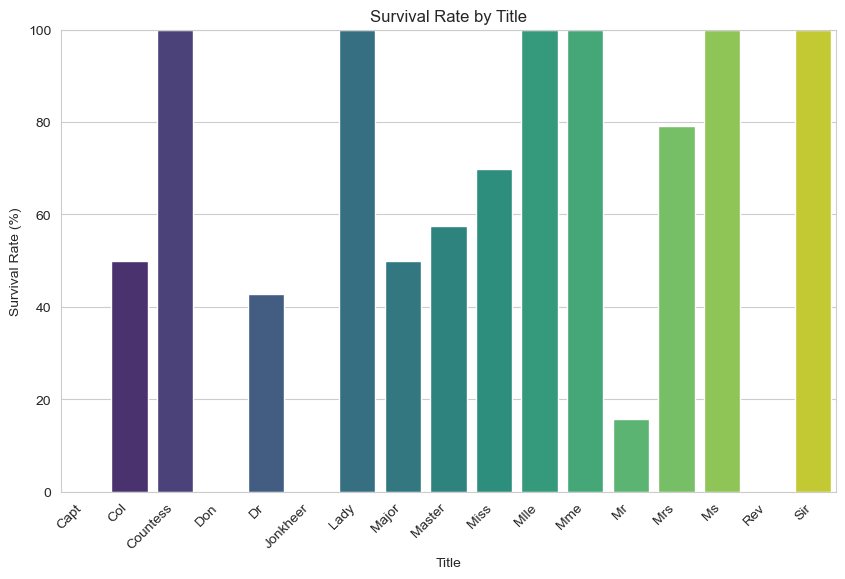

In [38]:
# Survival by Title
title_survival = train_data.groupby('Title')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=title_survival.index, y=title_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.show()

#### Survival by Deck

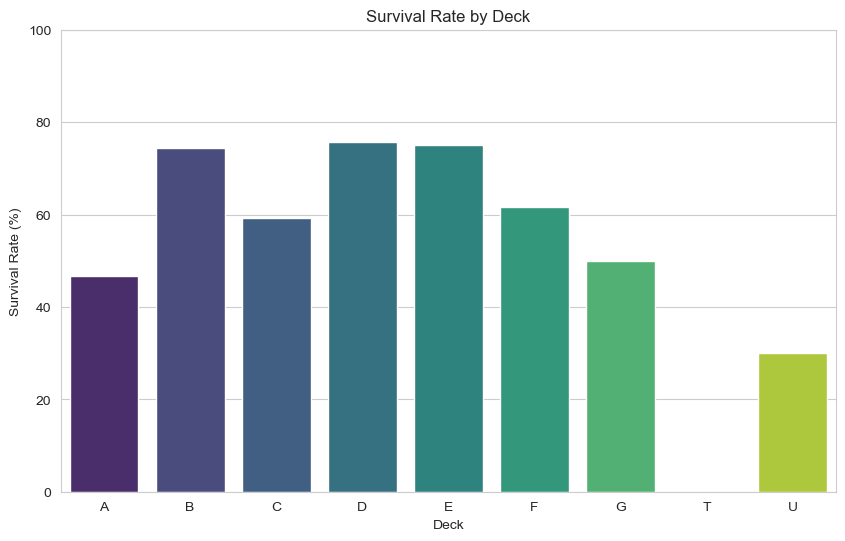

In [39]:
# Survival by Deck
deck_survival = train_data.groupby('Deck')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=deck_survival.index, y=deck_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival by FamilySize

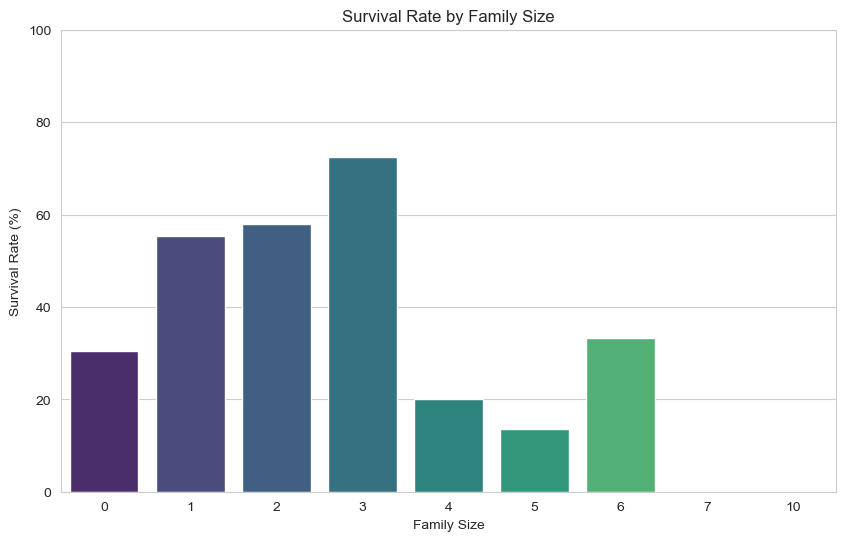

In [40]:
# Survival by Family Size
family_survival = train_data.groupby('FamilySize')['Survived'].agg(['sum', 'count']).assign(survival_rate=lambda x: (x['sum'] / x['count']) * 100)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y=family_survival['survival_rate'], palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

#### Survival Rate by Class and Fare Group

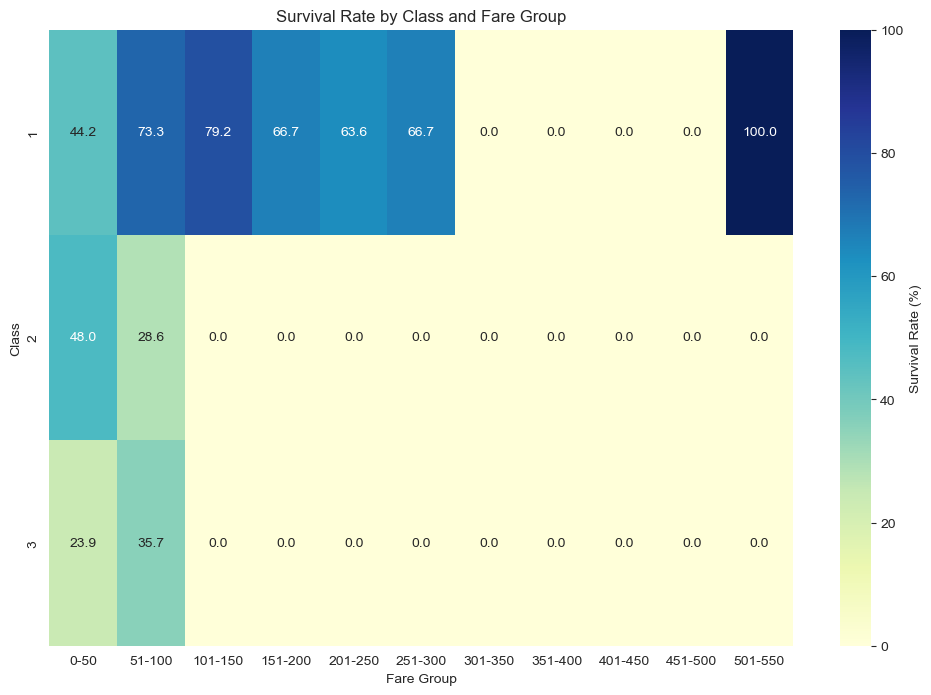

In [41]:
# Define fare bins and labels to cover the full range from 0.00 to 512.3292
fare_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550']
train_data['FareGroup'] = pd.cut(train_data['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Calculate survival rate by class and fare group
survival_by_class_fare = train_data.groupby(['Pclass', 'FareGroup'])['Survived'].mean().unstack().fillna(0) * 100

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(survival_by_class_fare, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Survival Rate (%)'})
plt.title('Survival Rate by Class and Fare Group')
plt.ylabel('Class')
plt.xlabel('Fare Group')
plt.show()

# Data Preprocessing

#### Drop FareGroup

In [42]:
train_data.drop(columns=['FareGroup'], inplace=True)

#### Apply Categorical Encoder to Sex, Embarked and Tittle Colums

In [43]:
from sklearn.preprocessing import OrdinalEncoder

# Apply Categorical Encoding
encoder = OrdinalEncoder()
train_data[['Sex', 'Embarked', 'Title', 'Deck']] = encoder.fit_transform(train_data[['Sex', 'Embarked', 'Title', 'Deck']])
test_data[['Sex', 'Embarked', 'Title', 'Deck']] = encoder.fit_transform(test_data[['Sex', 'Embarked', 'Title', 'Deck']])

#### Split data into dependent and independed various

In [44]:
 trainx=train_data.drop("Survived",axis=1,inplace=False)
trainy=train_data["Survived"]

#### Split data into training and validation

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(trainx, trainy, test_size=0.2, random_state=42)

# Model Design

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training

#### Train the model

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Validate the model on Validation Data 

In [48]:
# Make predictions on the validation set
valid_predictions = model.predict(X_valid)

In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_valid, valid_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8547486033519553


# Model Testing

#### Validate the model on Testing Data 

In [50]:
# Make predictions on the test set
test_predictions = model.predict(test_data)

#### Create Survided Column using predicted data

In [51]:
test_data['Survived']= test_predictions
test_data.head(10)

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
0          892       3  1.0  34.5      0      0   7.8292       1.0    5.0   
1          893       3  0.0  47.0      1      0   7.0000       2.0    6.0   
2          894       2  1.0  62.0      0      0   9.6875       1.0    5.0   
3          895       3  1.0  27.0      0      0   8.6625       2.0    5.0   
4          896       3  0.0  22.0      1      1  12.2875       2.0    6.0   
5          897       3  1.0  14.0      0      0   9.2250       2.0    5.0   
6          898       3  0.0  30.0      0      0   7.6292       1.0    4.0   
7          899       2  1.0  26.0      1      1  29.0000       2.0    5.0   
8          900       3  0.0  18.0      0      0   7.2292       0.0    6.0   
9          901       3  1.0  21.0      2      0  24.1500       2.0    5.0   

   Deck  FamilySize  Survived  
0   7.0           0         0  
1   7.0           1         0  
2   7.0           0         0  
3   7.0           0         0  
4   7.0           2         0  
5   7.0           0         0  
6   7.0           0         1  
7   7.0           2         0  
8   7.0           0         1  
9   7.0           2         0

#### Feature Importance 

In [52]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

        Feature  Importance
2           Sex    0.192799
0   PassengerId    0.164733
6          Fare    0.157011
3           Age    0.135555
8         Title    0.109795
1        Pclass    0.063489
9          Deck    0.053829
10   FamilySize    0.044393
7      Embarked    0.030316
4         SibSp    0.029496
5         Parch    0.018585


#### Top Features contribued to the survival of the person

In [53]:
# Display the top N most important features
top_n = 5  # Change this value to display more or fewer features
top_features = feature_importance_df.head(top_n)
print("Top contributing features:\n", top_features)

Top contributing features:
        Feature  Importance
2          Sex    0.192799
0  PassengerId    0.164733
6         Fare    0.157011
3          Age    0.135555
8        Title    0.109795
